In [ ]:
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Load Iris datasets **

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QykjLyocwIlECGLCPgBfIARS0-9m1Nne
# https://drive.google.com/file/d/1QykjLyocwIlECGLCPgBfIARS0-9m1Nne/view?usp=sharing

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1QykjLyocwIlECGLCPgBfIARS0-9m1Nne
To: /content/iris.csv
100% 3.87k/3.87k [00:00<00:00, 12.5MB/s]


In [ ]:
data = pd.read_csv('iris.csv')


In [ ]:
#looking at the first 5 values of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data[['variety']]
print("X.shape :", X.shape)
print(" Target.shape:",y.shape)


X.shape : (150, 4)
 Target.shape: (150, 1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

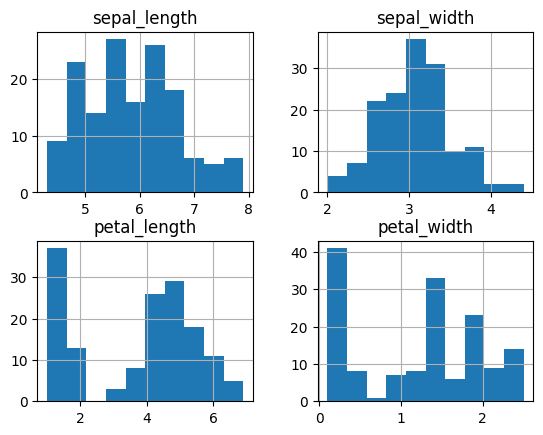

In [ ]:
data.hist()

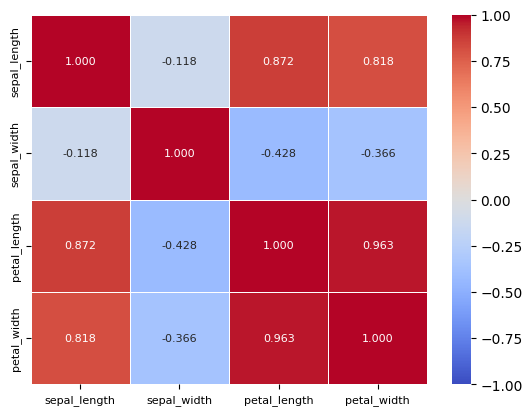

In [ ]:
# # Calculating correlation matrix
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f',
yticklabels=corr_matrix.columns, vmin=-1, vmax=1) #
# Plot correlation results
# Adjust font size of annotations
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

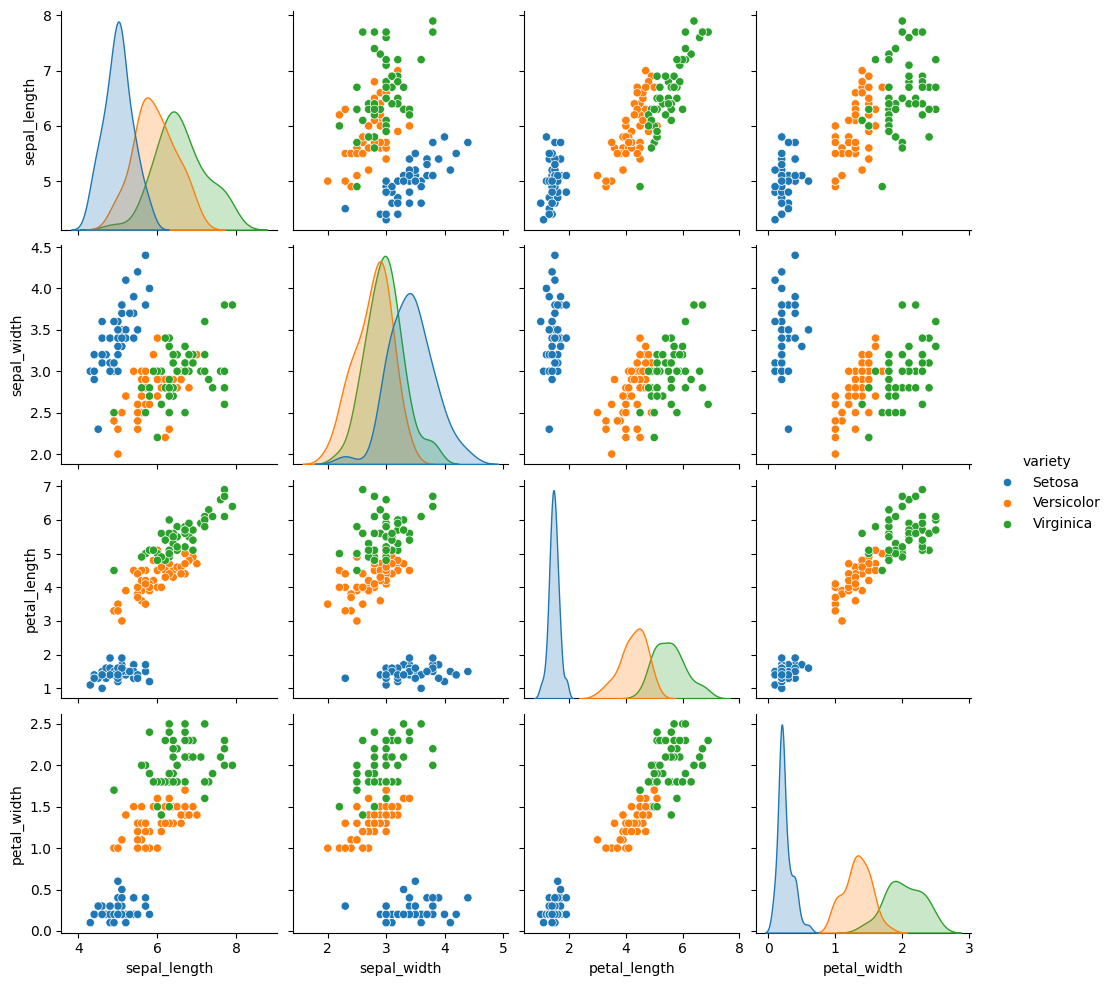

In [ ]:
# Plot phase portrait of

sns.pairplot(data, hue='variety')


<ipython-input-38-6fa1abbc3a27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["variety"] = y["variety"].replace(label_map)


Text(0.5, 1.0, 'New featuer extraction')

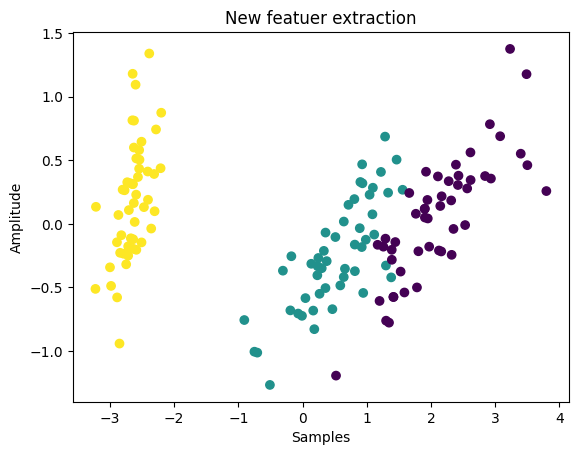

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
label_map = {"Virginica": 1, "Versicolor": 2, "Setosa": 3} # Replace label to 1, 2, 3
y["variety"] = y["variety"].replace(label_map)
tsne = PCA(n_components=2)
X_h = tsne.fit_transform(X)
plt.scatter(X_h[:,0],X_h[:,1],c=y["variety"])
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('New featuer extraction')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_h, y,shuffle=True, test_size = 0.20, random_state = 56)


**Linear SVC**

In [ ]:
model_Lin = SVC(C=0.01,kernel='linear',tol=0.0001, max_iter=2000)
model_Lin.fit(X_train, y_train)
accuracy_svm = model_Lin.score(X_test ,y_test )
print("test_accuracy:", accuracy_svm)

test_accuracy: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predicting the Test set results
y_pred_Lin = model_Lin.predict(X_test)
print(y_pred_Lin),print(y_test)

[1 2 2 1 1 1 2 3 3 2 2 3 3 3 2 3 3 3 1 2 3 1 2 2 3 1 1 2 2 2]
     variety
137        1
98         2
77         2
141        1
120        1
145        1
146        1
35         3
12         3
127        1
71         2
4          3
0          3
18         3
83         2
6          3
7          3
9          3
103        1
81         2
42         3
108        1
57         2
68         2
30         3
104        1
105        1
63         2
73         2
53         2


(None, None)

Text(70.72222222222221, 0.5, 'True labels')

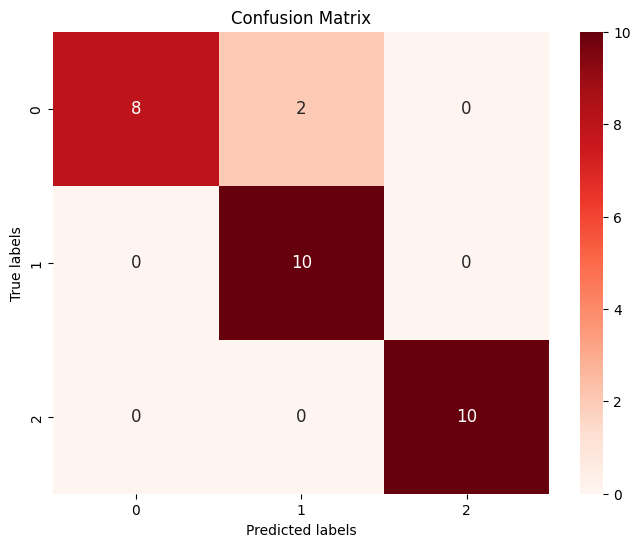

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
 # Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_Lin)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


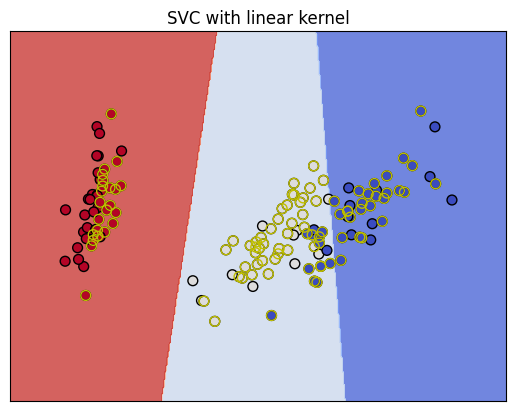

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Draw the decision region for the linear model
X0, X1 = X_h[:, 0], X_h[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots()

# Titles for the plots
titles = ['SVC with linear kernel']
plt.subplots_adjust(wspace=1, hspace=1)
plot_contours(ax, model_Lin, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y["variety"], cmap=plt.cm.coolwarm, s=50, edgecolors='k')
ax.scatter(
        model_Lin.support_vectors_[:, 0],
        model_Lin.support_vectors_[:, 1],
        s=50,
        facecolors="none",
        edgecolors="y",
    )
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')

plt.show()


Section C

In [ ]:
 # section 1.c (ج)
 # # Classification with polynomial kernel from one degree to ten degree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import imageio

#
def plot_decision_boundaries(X, y):
    degrees = range(1, 11)
    models = [SVC(kernel='poly', C=0.001, tol=0.0001, degree=degree, max_iter=2500) for degree in degrees]
    frames = []

    for degree, model in zip(degrees, models):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.contourf(xx, yy, Z, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y['variety'], edgecolors='k')
        plt.title(f'Degree = {degree}, Accuracy = {accuracy:.2f}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # PNG save
        filename = f'frame_{degree}.png'
        plt.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close()

    #
    imageio.mimsave('svm_polynomial_kernel.gif', frames,  fps=.5)

# plot results

plot_decision_boundaries(X_h, y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-22-47bbd01ff586>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-22-47bbd01ff586>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread

In [ ]:
# section 1.c (ج)
from sklearn.metrics import classification_report
model1 = SVC(C=0.1, kernel='poly', degree=1,tol=0.0001, max_iter=2000, verbose = 0)
model2 = SVC(C=0.1, kernel='poly', degree=2, tol=0.0001, max_iter=2000, verbose = 0)
model3 = SVC(C=0.1, kernel='poly', degree=3, tol=0.0001, max_iter=2000, verbose = 0 )
model4 = SVC(C=0.1, kernel='poly', degree=4, tol=0.0001, max_iter=2000, verbose = 0)
model5 = SVC(C=0.1, kernel='poly', degree=5, tol=0.0001, max_iter=2000, verbose = 0)
model6 = SVC(C=0.1, kernel='poly', degree=6, tol=0.0001, max_iter=2000, verbose = 0)
model7 = SVC(C=0.1, kernel='poly', degree=7, tol=0.0001, max_iter=2000, verbose = 0)
model8 = SVC(C=0.1, kernel='poly', degree=8, tol=0.0001, max_iter=2000, verbose = 0)
model9 = SVC(C=0.1, kernel='poly', degree=9, tol=0.0001, max_iter=2000, verbose = 0)
model10 = SVC(C=0.00974, kernel='poly', degree=10,tol=0.0001, max_iter=2000, verbose = 0)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)
model9.fit(X_train, y_train)
model10.fit(X_train, y_train)
accuracy_svm1 = model1.score(X_test ,y_test )
accuracy_svm2 = model2.score(X_test ,y_test )
accuracy_svm3 = model3.score(X_test ,y_test )
accuracy_svm4 = model4.score(X_test ,y_test )
accuracy_svm5 = model5.score(X_test ,y_test )
accuracy_svm6 = model6.score(X_test ,y_test )
accuracy_svm7 = model7.score(X_test ,y_test )
accuracy_svm8 = model8.score(X_test ,y_test )
accuracy_svm9 = model9.score(X_test ,y_test )
accuracy_svm10 = model10.score(X_test ,y_test )
# accuracy of ten model

print("test_accuracy:", accuracy_svm1,accuracy_svm2,accuracy_svm3,accuracy_svm4,accuracy_svm5,
      accuracy_svm6,accuracy_svm7,accuracy_svm8,accuracy_svm9,accuracy_svm10)

test_accuracy: 0.9333333333333333 0.8666666666666667 0.9333333333333333 0.7 0.8 0.7 0.8 0.6333333333333333 0.8 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)
y_pred8 = model8.predict(X_test)
y_pred9 = model9.predict(X_test)
y_pred10 = model10.predict(X_test)
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))
print(classification_report(y_test, y_pred4))
print(classification_report(y_test, y_pred5))
print(classification_report(y_test, y_pred6))
print(classification_report(y_test, y_pred7))
print(classification_report(y_test, y_pred8))
print(classification_report(y_test, y_pred9))
print(classification_report(y_test, y_pred10))

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           1       1.00      0.60      0.75        10
           2       0.83      1.00      0.91        10
           3       0.83      1.00      0.91        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        1

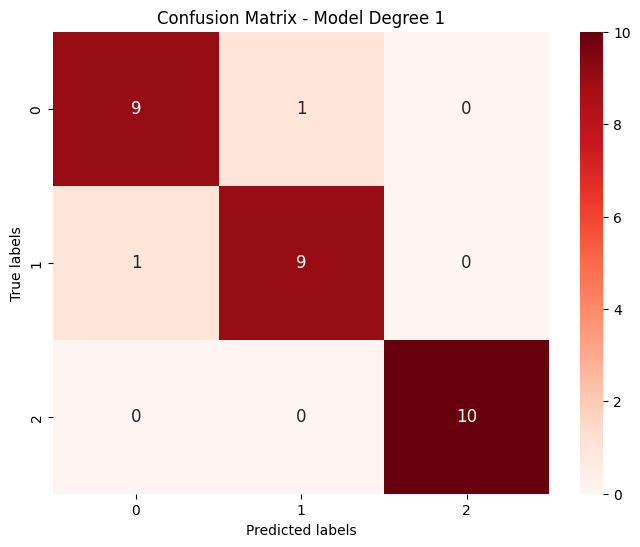

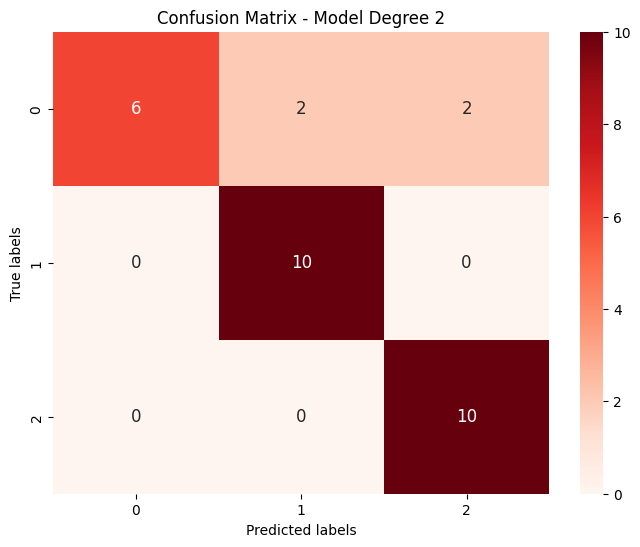

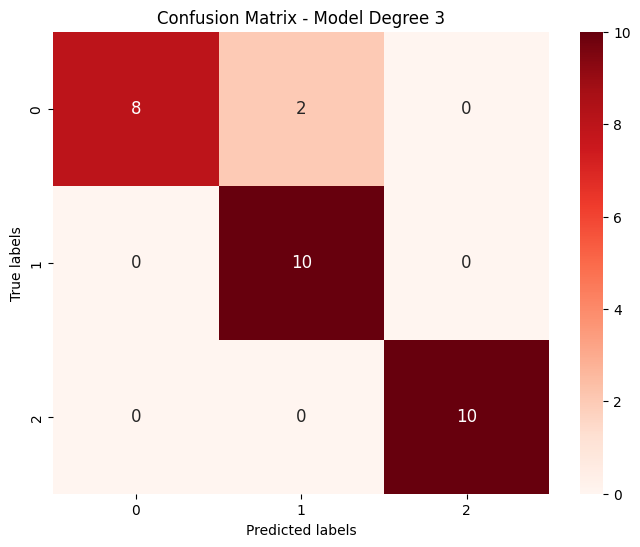

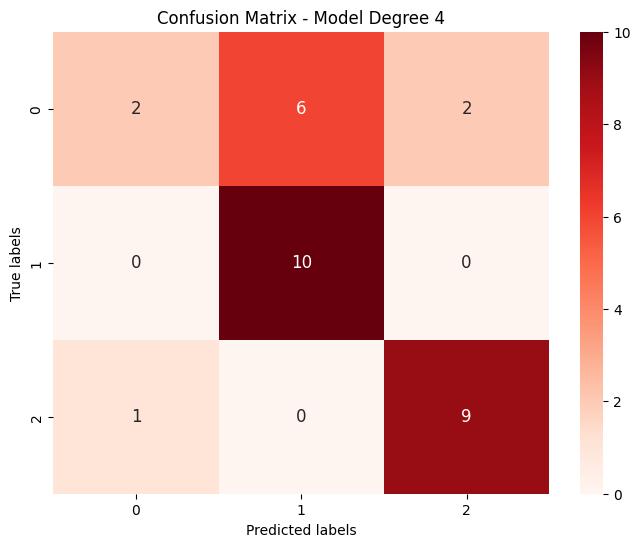

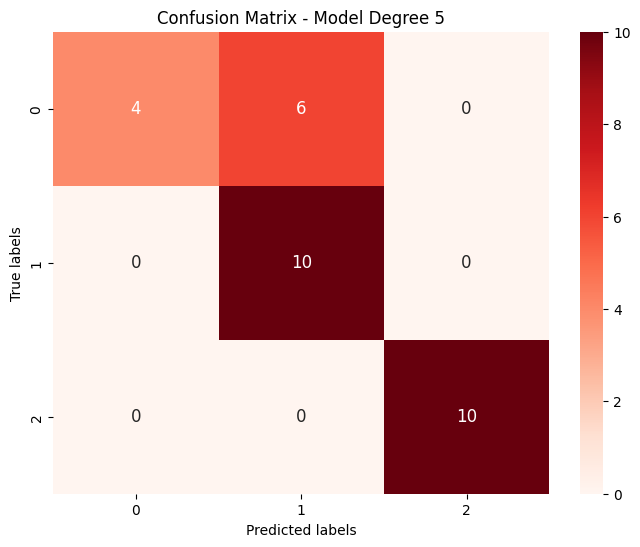

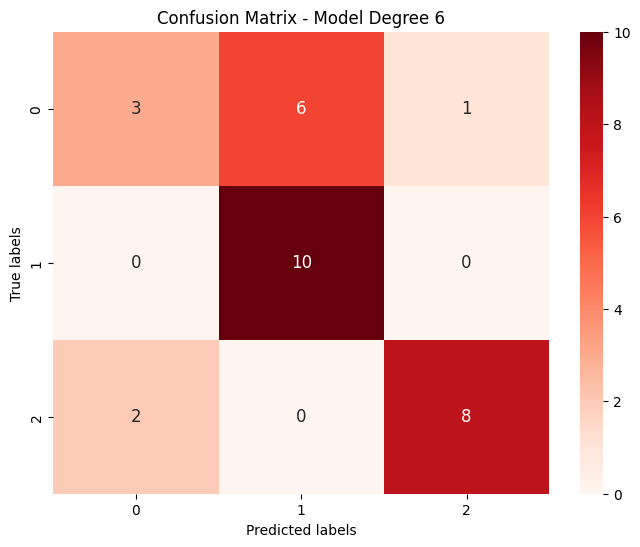

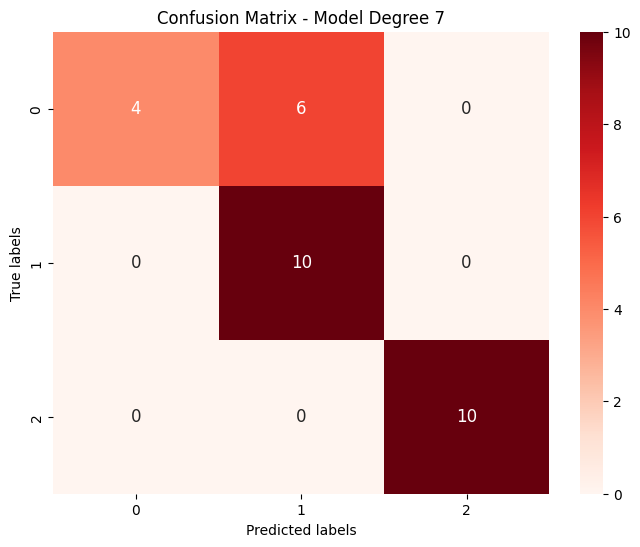

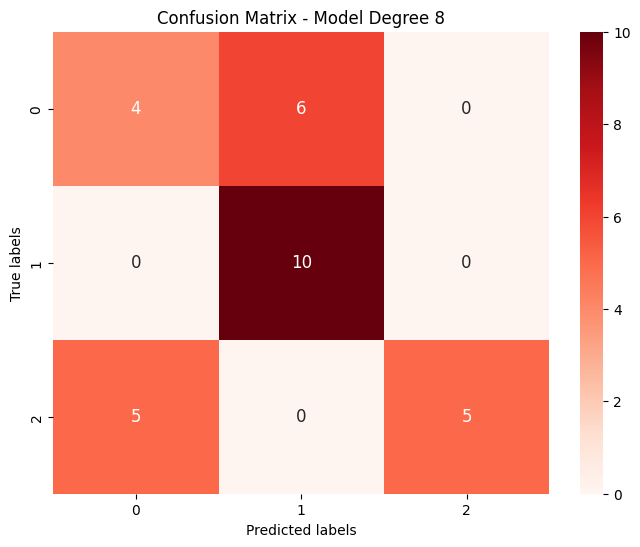

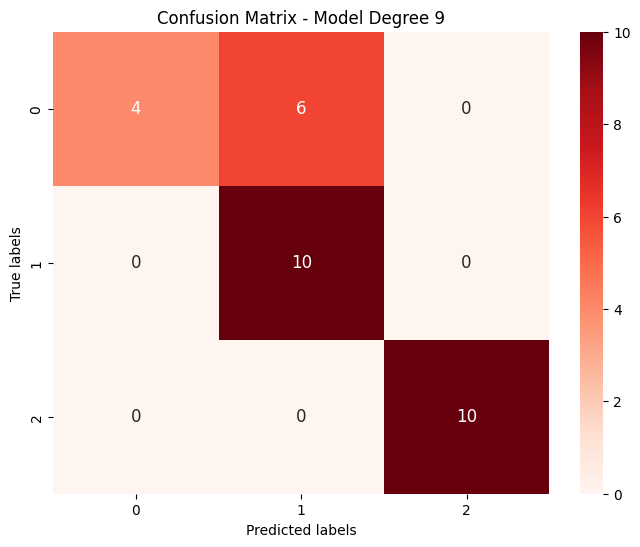

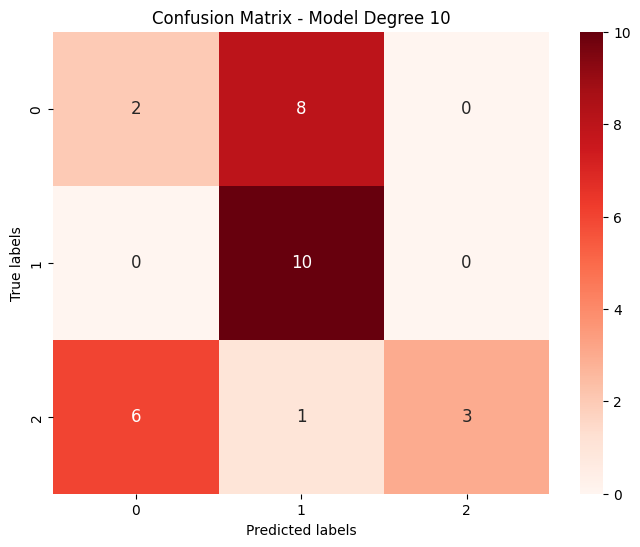

In [ ]:
# Calculating of ten Confusion matrix
from sklearn.metrics import confusion_matrix
# List of model degrees
model_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Iterate over model degrees
for degree in model_degrees:
    # Making the Confusion Matrix
    cf_matrix = confusion_matrix(y_test, globals()[f"y_pred{degree}"])

    # Plotting confusion matrix as a heatmap with fitted text
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

    # Get the axis to modify layout
    plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
    plt.title(f'Confusion Matrix - Model Degree {degree}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.show()


In [ ]:
import imageio

# List of model degrees
model_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Save the plot frames as a GIF
frames = []

# Iterate over model degrees
for degree in model_degrees:
    fig, ax = plt.subplots()
    # plt.clf()

    # Plot the real labels
    ax.scatter(range(len(y_test)), y_test, c='g', marker='o', edgecolors='k', label='Real Labels', s=50)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Class Label')
    ax.set_title('Real Labels')

    # Plot the predicted labels
    ax.scatter(range(len(y_pred2)), globals()[f"y_pred{degree}"], c='r', marker='x', label='Predicted Labels', s=50)
    ax.set_xlabel('Sample')
    ax.set_ylabel('Class Label')
    ax.set_title(f'Predicted Labels for degree {degree}')
    ax.legend()
    # plt.clf()

    # Save the current figure to a buffer
    plt.draw()
    # plt.clf()

    # Convert the figure to a numpy array
    buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf = buf.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Append the buffer to the frames list
    frames.append(buf)

    # Clear the current figure

    plt.close(fig)
    plt.clf()


# Save the frames as a GIF
imageio.mimsave('predicted_labels.gif', frames, fps=.5)
plt.show()

<Figure size 640x480 with 0 Axes>

**Section d (د)**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
Xn= iris.data
yn= iris.target

Text(0.5, 1.0, 'New featuer extraction')

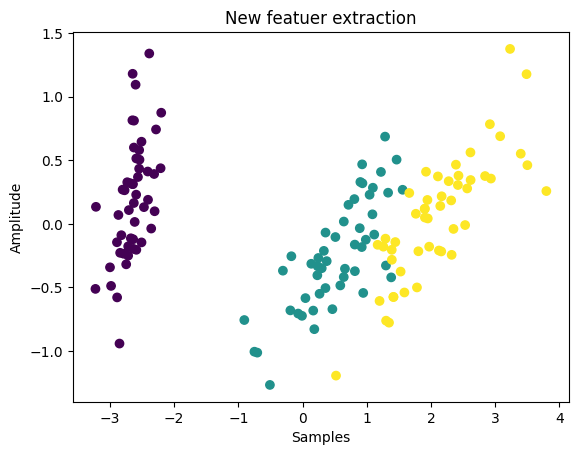

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(X_h, y,shuffle=True, test_size = 0.20, random_state = 56)

# label_map = {"Virginica": 1, "Versicolor": 2, "Setosa": 3} # Replace label to 1, 2, 3
# y["variety"] = y["variety"].replace(label_map)
tsne = PCA(n_components=2)
Xn_h = tsne.fit_transform(Xn)
plt.scatter(Xn_h[:,0],Xn_h[:,1],c=yn )
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('New featuer extraction')


In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn_h, yn,shuffle=True, test_size = 0.20, random_state = 16)


In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import imageio
import os
import cvxopt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Display initial information about the dataset
print("Dataset dimensions:", iris_df.shape)
print("\nGeneral information about the dataset:\n", iris_df.info())

# Display descriptive statistics in a table format
descriptive_stats = iris_df.describe().to_string()
print("\nDescriptive statistics:\n", descriptive_stats)

# Calculate mean and variance of the features
mean_values = iris_df.mean()
variance_values = iris_df.var()

print("\nMean values of features:\n", mean_values)
print("\nVariance of features:\n", variance_values)

Dataset dimensions: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

General information about the dataset:
 None

Descriptive statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)     species
count         150.000000        150.000000         150.000000        150.000000  150.000000
mean            5.843333          3.057333           3.758000          1.199333    1.000000
std             0.828066          0.435866           1.765298          0.762238    0.819232
min             4.300000          2.00000

In [ ]:
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d



def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4)):
    kernel_and_params = (kernel_type, poly_params, C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non-zero Lagrange multipliers
    sv = a > 1e-6  # some small threshold

    # Support vectors have non-zero Lagrange multipliers
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv = len(sv_y)

    # Bias (For linear it is the intercept):
    bias = 0
    if len(a) > 0:
        for n in range(len(a)):
            # For all support vectors:
            bias += sv_y[n]
            bias -= np.sum(a * sv_y * K[ind[n], sv])
        bias = bias / len(a)
    else:
        print("No support vectors found")
        bias = 0

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred = 0
    # Create the decision boundary for the plots. Calculates the hypothesis.
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)
                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution, a, sv_x, sv_y, y_pred, kernel_and_params

def multiclass_svm(X,X_t, y, C, kernel_type, poly_params=(1, 4)):

    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch={} #catching w, b only for plot part
    b_catch={}
    a_catch={}
    sv_x_catch={}
    sv_y_catch={}
    # Step 3: Train binary SVM models for each required class combination
    for i,class_label in enumerate(class_labels):
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _,a, sv_x, sv_y,prediction, kernel_and_params=SVM1(X,X_t, binary_y, C,kernel_type,poly_params)
        classifiers[class_label] = prediction
        w_catch[class_label]=w
        b_catch[class_label]=bias
        a_catch[class_label]=a
        sv_x_catch[class_label]=sv_x
        sv_y_catch[class_label]=sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1),kernel_and_params,w_catch, b_catch,classifiers
    return decision_function(X_t)

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params,degrees):
    plt.figure(figsize=(8, 6))
    (_,poly_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title(f'Data Points on Train Set {degrees}')
    else:
        plt.title(f'Data Points on Test Set {degrees}')

    plt.xlabel('PcA Component 1')
    plt.ylabel('PcA Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)


def calculate_metrics_and_plot(y_true, y_pred,degrees , labels=None):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average=None, labels=labels)
    recall = recall_score(y_true, y_pred, average=None, labels=labels)
    f1 = f1_score(y_true, y_pred, average=None, labels=labels)

    # Calculate accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)

    # Print precision, recall, F1-score, and accuracy
    for i in range(len(labels)):
        print(f"Class {labels[i]} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-score: {f1[i]:.4f}")

    print(f"Accuracy: {accuracy:.4f}")

    # Set custom color map and font size
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', xticklabels=labels, yticklabels=labels, annot_kws={"size": 14})

    # Set the title font
    heatmap.set_title(f'Confusion Matrix {degrees}', fontdict={'fontsize': 16, 'family': 'serif'})

    plt.xlabel('Predicted')
    plt.ylabel('True')

    return accuracy


In [ ]:
degrees = range(1, 11)
acc = []
images_train = []
images_test = []
images_conf = []
# Train SVM with polynomial kernels of degree 1 to 10
for degree in degrees:
    #*****here is the callable function *****--------------------------------------------------------------
    # Split the data into training and test sets
    x_train = Xn_train
    x_test = Xn_test
    y_test = yn_test
    y_train = yn_train

    model=multiclass_svm(x_train,x_test, y_train, degree,'polynomial', poly_params=(1, degree))
    pred, kernel_and_params,w_catch, b_catch, classifiers=model

    #*****here is the callable function *****--------------------------------------------------------------
    class_0 = 0
    class_1 = 1
    class_2 = 2

    plt.figure()
    visualize_multiclass_classification(x_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params, degree)
    filename1 = f'svm_degree_{degree}_train_support_vector.png'
    plt.savefig(filename1)
    images_train.append(imageio.imread(filename1))
    plt.close()

    plt.figure()
    visualize_multiclass_classification(x_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params, degree)
    filename2 = f'svm_degree_{degree}_test_support_vector.png'
    plt.savefig(filename2)
    images_test.append(imageio.imread(filename2))
    plt.close()

    print(iris.target_names[class_0:class_2+2])

    # Evaluate the model on the training set
    if __name__ == "__main__":
        plt.figure()
        y_true = y_test
        y_pred = pred
        print(f"Degree: {degree}\n")
        acc.append(calculate_metrics_and_plot(y_true, y_pred, degree, labels=[0, 1, 2]))
        filename3 = f'svm_degree_{degree}_Confusion_Matrix.png'
        plt.savefig(filename3)
        images_conf.append(imageio.imread(filename3))
        plt.close()

# Path to save the GIF
gif_path_train = 'svm_poly_degrees_train_support_vector_fromsh.gif'
imageio.mimsave(gif_path_train, images_train,  fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_train}")

# Path to save the GIF
gif_path_test = 'svm_poly_degrees_test_support_vector_fromsh.gif'
imageio.mimsave(gif_path_test, images_test, fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_test}")

# Path to save the GIF
gif_path_conf = 'svm_poly_degrees_Confusion_Matrix_fromsh.gif'
imageio.mimsave(gif_path_conf, images_conf ,  fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_conf}")

<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 1

Class 0 - Precision: 0.6250, Recall: 1.0000, F1-score: 0.7692
Class 1 - Precision: 0.6250, Recall: 0.4167, F1-score: 0.5000
Class 2 - Precision: 0.8333, Recall: 0.6250, F1-score: 0.7143
Accuracy: 0.6667


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 2

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.9167, Recall: 0.9167, F1-score: 0.9167
Class 2 - Precision: 0.8750, Recall: 0.8750, F1-score: 0.8750
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 3

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.9167, Recall: 0.9167, F1-score: 0.9167
Class 2 - Precision: 0.8750, Recall: 0.8750, F1-score: 0.8750
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 4

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.9167, Recall: 0.9167, F1-score: 0.9167
Class 2 - Precision: 0.8750, Recall: 0.8750, F1-score: 0.8750
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 5

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.9091, Recall: 0.8333, F1-score: 0.8696
Class 2 - Precision: 0.7778, Recall: 0.8750, F1-score: 0.8235
Accuracy: 0.9000


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 6

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 1.0000, Recall: 0.8333, F1-score: 0.9091
Class 2 - Precision: 0.8000, Recall: 1.0000, F1-score: 0.8889
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-25-fc71d3dc8908>:120: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.

['setosa' 'versicolor' 'virginica']
Degree: 7

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 1.0000, Recall: 0.8333, F1-score: 0.9091
Class 2 - Precision: 0.8000, Recall: 1.0000, F1-score: 0.8889
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))
<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 8

Class 0 - Precision: 0.9091, Recall: 1.0000, F1-score: 0.9524
Class 1 - Precision: 1.0000, Recall: 0.8333, F1-score: 0.9091
Class 2 - Precision: 0.8889, Recall: 1.0000, F1-score: 0.9412
Accuracy: 0.9333


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


No support vectors found
No support vectors found


<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))


No support vectors found


<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


['setosa' 'versicolor' 'virginica']
Degree: 9

Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 1.0000, Recall: 0.9167, F1-score: 0.9565
Class 2 - Precision: 0.8889, Recall: 1.0000, F1-score: 0.9412
Accuracy: 0.9667


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


No support vectors found
No support vectors found


<ipython-input-28-fced62456997>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))


No support vectors found


<ipython-input-28-fced62456997>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['setosa' 'versicolor' 'virginica']
Degree: 10

Class 0 - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Class 1 - Precision: 1.0000, Recall: 0.8333, F1-score: 0.9091
Class 2 - Precision: 0.4000, Recall: 1.0000, F1-score: 0.5714
Accuracy: 0.6000


<ipython-input-28-fced62456997>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


NameError: name 'frames' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Path to save the GIF
gif_path_train = 'svm_poly_degrees_train_support_vector_fromsh.gif'
imageio.mimsave(gif_path_train, images_train,  fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_train}")

# Path to save the GIF
gif_path_test = 'svm_poly_degrees_test_support_vector_fromsh.gif'
imageio.mimsave(gif_path_test, images_test, fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_test}")

# Path to save the GIF
gif_path_conf = 'svm_poly_degrees_Confusion_Matrix_fromsh.gif'
imageio.mimsave(gif_path_conf, images_conf ,  fps=.5)
# Display the path to the GIF
print(f"GIF saved as {gif_path_conf}")

GIF saved as svm_poly_degrees_train_support_vector_fromsh.gif
GIF saved as svm_poly_degrees_test_support_vector_fromsh.gif
GIF saved as svm_poly_degrees_Confusion_Matrix_fromsh.gif
